In [73]:
!python --version

Python 3.10.2


--------
## 2.1 Iris Dataset

In [74]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [75]:
dataset = load_iris()
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=dataset.feature_names)
df['label'] = y

In [85]:
mean_per_type = dict()
std_per_type = dict()
labels = df['label'].unique()
for label in labels:
    mask = df['label'] == label
    mean_per_type[label] = dict(df[mask].iloc[:, :-1].mean())
    std_per_type[label] = dict(df[mask].iloc[:, :-1].std())


In [77]:
from itertools import combinations
comb = list(combinations(mean_per_type.keys(), 2))

for c in comb:
    mean1 = mean_per_type[c[0]]
    mean2 = mean_per_type[c[1]]
    std1 = std_per_type[c[0]]
    std2 = std_per_type[c[1]]
    print(32*"#")
    print(f"{str(dataset.target_names[c[0]]).upper()} vs {str(dataset.target_names[c[1]]).upper()}")
    for key in mean1.keys():
        print(f"{key}")
        print(f"\tmean = {mean1[key]-mean2[key]:.2f}")
        print(f"\tstd = {std1[key]-std2[key]:.2f}")

    print(32*"#","\n")


################################
SETOSA vs VERSICOLOR
sepal length (cm)
	mean = -0.93
	std = -0.16
sepal width (cm)
	mean = 0.66
	std = 0.07
petal length (cm)
	mean = -2.80
	std = -0.30
petal width (cm)
	mean = -1.08
	std = -0.09
################################ 

################################
SETOSA vs VIRGINICA
sepal length (cm)
	mean = -1.58
	std = -0.28
sepal width (cm)
	mean = 0.45
	std = 0.06
petal length (cm)
	mean = -4.09
	std = -0.38
petal width (cm)
	mean = -1.78
	std = -0.17
################################ 

################################
VERSICOLOR vs VIRGINICA
sepal length (cm)
	mean = -0.65
	std = -0.12
sepal width (cm)
	mean = -0.20
	std = -0.01
petal length (cm)
	mean = -1.29
	std = -0.08
petal width (cm)
	mean = -0.70
	std = -0.08
################################ 



In [78]:
def compute_mean(ser:pd.Series) -> float:
    x = np.sum(ser)/len(ser)
    return x

def compute_std(ser:pd.Series) -> float:
    m = compute_mean(ser)
    x = 0
    for element in ser:
        x += (element - m)**2
    
    x = x/len(ser)
    return np.sqrt(x)
        

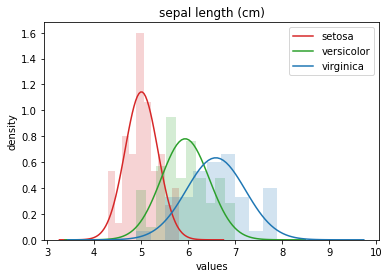

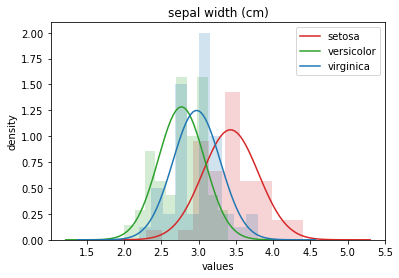

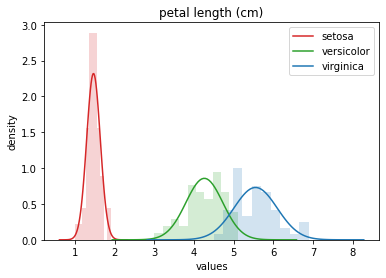

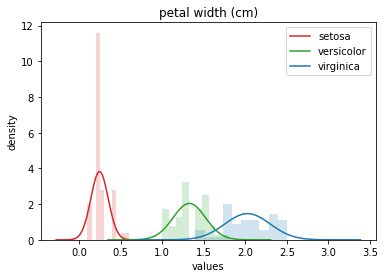

In [79]:
from scipy.stats import norm

def plot_results(df:pd.DataFrame, column, labels, colors):
    for cnt, label in enumerate(labels):
        temp_df = df[df['label'] == label]
        ser = temp_df[column]
        u = compute_mean(ser)
        s = compute_std(ser)
        x = np.linspace(u-5*s, u+5*s, 100)
        plt.hist(ser, alpha=0.2, density=True, color=colors[cnt])
        plt.plot(x, norm(u,s).pdf(x), label=dataset.target_names[label], color=colors[cnt])
        plt.title(column)
        plt.xlabel("values")
        plt.ylabel("density")
        plt.legend()
    plt.show()
        
for column in df.columns[:-1]:
    plot_results(df, column, labels, colors=['tab:red','tab:green','tab:blue']) 

In [118]:
def naive_clf(csv_sample:str, clf_data:dict) -> str:
    """This is a naive classifier in which we
    use the petal length and width to classify
    the input sample

    Args:
        csv_sample (str): string of values concerning
        sepal length/width and petal length/width
        clf_data (dict): dictionary containing feature name,
        and for each label it contains a tuple with 
        mean and std of that label

    Returns:
        str: class
    """
    
    # We're interested in last 2 features
    sample = list(csv_sample.strip().split(','))[-2:]
    
    # petal length
    pl = float(sample[0])
    # petal width
    pw = float(sample[1])
    
    # Select dictionaries concerning length and width
    petal_length_ = clf_data['petal length (cm)']
    petal_width_ = clf_data['petal width (cm)']
    
    # Classify the sample by checking if the passed values belong to the
    # interval of mean +/- 3*std of a certain class
    for length, width in zip(petal_length_.items(), petal_width_.items()):
        label = length[0] # length or width is the same, we just need the label
        u_l, s_l = length[1] # pick the mean and std values for length feature
        u_w, s_w = width[1] # pick the mean and std values for length feature
        if (u_l-3*s_l < pl < u_l+3*s_l) and (u_w-3*s_w < pw < u_w+3*s_w):
            target = dataset.target_names[label]
    
    return str(target)
    
    
clf_data = dict()
features = ["petal length (cm)", "petal width (cm)"]
for feature in features:
    temp_dict = dict()
    for label in labels:
        temp_dict[label] = mean_per_type[label][feature], std_per_type[label][feature]
    clf_data[feature] = temp_dict


samples = ["5.2, 3.1, 4.0, 1.2", "4.9, 2.5, 5.6, 2.0", "5.4, 3.2, 1.9, 0.4"]

for sample in samples:
    target_class = naive_clf(sample, clf_data)
    print(f"The sample {sample} is classified as {target_class}")


The sample 5.2, 3.1, 4.0, 1.2 is classified as versicolor
The sample 4.9, 2.5, 5.6, 2.0 is classified as virginica
The sample 5.4, 3.2, 1.9, 0.4 is classified as setosa


--------
## 2.2 Citybik.es Dataset

In [121]:
# Don't run this cell if you want to obtain same results,
# otherwise it will download again the dataset
!wget "http://api.citybik.es/v2/networks/to-bike" -O bikes.json

--2022-04-06 19:59:47--  http://api.citybik.es/v2/networks/to-bike
Resolving api.citybik.es (api.citybik.es)... 213.52.129.109
Connecting to api.citybik.es (api.citybik.es)|213.52.129.109|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35719 (35K) [application/json]
Saving to: ‘bikes.json’

bikes.json          100%[===================>]  34,88K  --.-KB/s    in 0,03s   

2022-04-06 19:59:48 (1,21 MB/s) - ‘bikes.json’ saved [35719/35719]



In [134]:
import json

with open("bikes.json") as f:
    obj = json.load(f)
    
    # This JSON file is a dict of dict.
    # We need the station one.
    # Hence we reassign it.
    # obj is now a list of dictionaries. 
    # One item for each station
    obj = obj['network'] ['stations']

In [150]:
cnt = 0
print("Printing active stations:")
for i in range(len(obj)):
    if obj[i]['extra']['status'] == 'online':
        cnt += 1
        print(f"    {obj[i]['name']} \n\t -> {obj[i]['free_bikes']} free bikes")

print(f"Total number of active stations: {cnt}")

Printing active stations:
    Porta Susa 1 
	 -> 12 free bikes
    Cernaia 
	 -> 5 free bikes
    Consolata 
	 -> 6 free bikes
    Porta Palatina 
	 -> 6 free bikes
    Porta Nuova 1 
	 -> 12 free bikes
    San Francesco da Paola 
	 -> 2 free bikes
    Carlo Alberto 
	 -> 7 free bikes
    02. Pettiti 
	 -> 2 free bikes
    03. C. Commerciale I Portici 
	 -> 0 free bikes
    08. San Marchese 
	 -> 1 free bikes
    10. Gallo Praile 
	 -> 3 free bikes
    02. BIKE POINT Mandria 
	 -> 2 free bikes
    Sant´Anselmo 
	 -> 3 free bikes
    Paravia 
	 -> 1 free bikes
    Giachino 
	 -> 4 free bikes
    Belfiore 
	 -> 5 free bikes
    Valdocco 2 
	 -> 9 free bikes
    Valdocco 
	 -> 8 free bikes
    Regina Margherita 4 
	 -> 9 free bikes
    Borromini 
	 -> 8 free bikes
    Universita`3 
	 -> 4 free bikes
    Politecnico 3 
	 -> 13 free bikes
    Principi d`Acaja 2 
	 -> 3 free bikes
    Adriano 
	 -> 5 free bikes
    Castello 1 
	 -> 8 free bikes
    04. Reggia 
	 -> 0 free bikes
    06. Munic

In [146]:
obj[0]['free_bikes']

12

In [154]:
bikes = 0
docks = 0

for i in range(len(obj)):
    print(f"Station {obj[i]['name']}")
    bikes += obj[i]['free_bikes']
    docks += obj[i]['empty_slots']
    print(f"\t{obj[i]['free_bikes']} available bikes.")
    print(f"\t{obj[i]['empty_slots']} free docks.")
    
print(f"The total amount of available bikes is {bikes}")
print(f"The total amount of free docks is {docks}")


Station Porta Susa 1
	12 available bikes.
	6 free docks.
Station Cernaia
	5 available bikes.
	10 free docks.
Station Consolata
	6 available bikes.
	8 free docks.
Station Corte d`Appello
	3 available bikes.
	10 free docks.
Station Porta Palatina
	6 available bikes.
	6 free docks.
Station Porta Nuova 1
	12 available bikes.
	14 free docks.
Station San Francesco da Paola
	2 available bikes.
	12 free docks.
Station Carlo Alberto
	7 available bikes.
	4 free docks.
Station 01. Gerbido
	0 available bikes.
	0 free docks.
Station 02. Fabbrichetta
	0 available bikes.
	0 free docks.
Station 03. Borgo
	0 available bikes.
	0 free docks.
Station 04. Villa Claretta
	0 available bikes.
	0 free docks.
Station 05. Universita`
	0 available bikes.
	0 free docks.
Station 06. Le Serre
	0 available bikes.
	1 free docks.
Station 07. Stazione Ferroviaria Paradiso
	0 available bikes.
	0 free docks.
Station 08. Lupo
	0 available bikes.
	0 free docks.
Station 01. Certosa / P.le Avis
	0 available bikes.
	0 free doc

In [155]:
from math import cos, acos, sin
import numpy as np

def distance_coords(lat1, lng1, lat2, lng2):
    """Compute the distance among two points."""

    deg2rad = lambda x: x * np.pi / 180

    lat1, lng1, lat2, lng2 = map(deg2rad, [ lat1, lng1, lat2, lng2 ])

    R = 6378100 # Radius of the Earth, in meters

    return R * acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lng1 - lng2))

In [161]:
lat1 = obj[0]['latitude']
lon2 = obj[0]['longitude']

In [162]:
lat, lon = 45.074512, 7.694419

distance_coords(lat1, lon2, lat, lon)

2088.625500975644

In [218]:
def nearest_station(latitude:float, longitude:float, num_required_bikes:int):
    """Function that will return the nearest station given 
    latitude and longitude coordinates

    Args:
        latitude (float): latitude of the starting point
        longitude (float): longitude of the starting point
        num_required_bikes (int): number of required bikes

    Returns:
        tuple(str, float): the name of the nearest station and the distance in meters
    """
    
    # Set the minimum distance to infinity,
    # so it will be initialized in the 1st iteration of the loop
    min_distance = np.inf
    nearest_station = None
    
    target_lat = None
    target_lon = None
    
    # Loop in every station
    for i in range(len(obj)):    
        # Check if the station satisfy the number of bikes required
        if obj[i]['free_bikes'] >= num_required_bikes:
            # Pick the latitude and longitude of the station
            # and compute the distance
            lat_station, lon_station = obj[i]['latitude'], obj[i]['longitude']
            distance = distance_coords(latitude, longitude, lat_station, lon_station)
            # If the distance computed is less then the minimum distance
            # then it will become the new minimum distance.
            # In such case, we save the name of the station
            # and its coordinates
            if min_distance > distance:
                min_distance = distance
                nearest_station = obj[i]['name']
                target_lat, target_lon = lat_station, lon_station
                
        else:
            continue 
    
    if min_distance == np.inf:
        print("There are no stations that match you requirements.")
        return None
    
    return f"The nearest station is {nearest_station} {target_lat, target_lon}, {min_distance:.2f} meters away from you"



In [219]:
massaua = (45.074565436389264, 7.619543377481778) # Massaua

polito = (45.06248994401427, 7.662332107466045) # PoliTo ingresso Corso Duca

lat, lon = 45.074512, 7.694419 # Exercise
 
nearest_station(*polito, 1)


'The nearest station is Politecnico 2 (45.062132, 7.663007), 66.36 meters away from you'